# Multilayered Neural Network

SURAJ ESWARAN

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multilayered-Neural-Network" data-toc-modified-id="Multilayered-Neural-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multilayered Neural Network</a></span><ul class="toc-item"><li><span><a href="#Required-Part-One" data-toc-modified-id="Required-Part-One-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Required Part One</a></span></li><li><span><a href="#Required-Part-Two" data-toc-modified-id="Required-Part-Two-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Required Part Two</a></span></li></ul></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extra Credit</a></span></li></ul></div>

You will implement a set of functions for training and testing a multilayered neural network to predict continuous-valued target values.  This assignment provides an implementation of the functions for a neural network with one hidden layer.  You must modify the functions to allow any number of hidden layers, each with any number of units.

The required functions are:

* `add_ones(X)`: Given an $N \times D$ matrix of inputs, prepend column of 1's and return the resulting $N \times D+1$ matrix.
* `make_weights(n_inputs, n_hiddens, n_outputs):` Given integers `n_inputs`, `n_hiddens` and `n_outputs`, create weight matrices `V` for the hidden layer and `W` for the output layer.
* `forward(Xst, V, W)`: Given standardized input matrix `Xst` and weight matrices `V` and `W`, calculate the output of all layers and return the outputs of the hidden layer, `Z` as an $N \times H$ matrix, where $H$ is the number of hidden units, and the outputs of the output layer `Y` as an $N \times K$ matrix, where $K$ is the number of output values for each sample. 
* `backward(Xst, Tst, V, W)`: Given standardized input matrix `Xst`, standardized target matrix `Tst`, and weight matrices `V` and `W`,, calculate the gradient of the mean squared error with respect to the weights `V` and `W`, returning a tuple of both gradients, with respect to `V` as the first element and with respect to `W` as the second element.
* `train_sgd(X, T, V, W, learning_rate, n_epochs):` Given input and target matrices `X` and `T`, weight matrices `V` and `W`, a learning_rate and the number of epochs to train, update the weights for `n_epochs` iterations using the gradient of the mean squared over the whole data set in `X` and `T`  and return the resulting new weight matrices `V` and `W`, the standardization parameters, and the list of RMSE training errors, one per epoch.
* `use(X, V, W, stand_parms):` Calculate outputs of both layers after standardizing input `X`. Return outputs of hidden layer, and unstandardized output of output layer.
* `rmse(Y, T):` Return the RMSE between `Y` and `T`, both of which are not standardized.
* `calc_standardize_parameters(X, T)`: calculate and return as a dictionary the column means and standard deviations of `X` and `T`.
* `standardize_X(X, stand_parms)`: return standardized `X`.
* `standardize_T(T, stand_parms)`: return standardized `T`.
* `unstandardize_X(Xst, stand_parms)`: return unstandardized `X` (probably not needed).
* `unstandardize_T(Tst, stand_parms)`: return unstandardized `T`, will be needed by `use`.

## Required Part One

The changes you must implement are specified here.  We recommend that you copy the above code cells and paste them below, then edit them appropriately.

You will implement a set of functions for training and testing a multilayered neural network to predict continuous-valued target values.  This assignment provides an implementation of the functions for a neural network with one hidden layer.  You must modify the functions to allow any number of hidden layers, each with any number of units.

The required functions are:

* `make_weights(n_inputs, n_hiddens_list, n_outputs):` Given integers `n_inputs`, list of `n_hiddens`, one integer per hidden layer, and `n_outputs`, create and return list of weight matrices, one for each layer.
* `forward(Xst, Ws)`: Given standardized input matrix `X` and list of weight matrices `Ws`, calculate the output of all layers and return a list of the outputs of each layer.
* `backward(Xst, Tst, Ws)`: Given standardized input matrix `X`, standardized target matrix `T`, and list of weight matrices `Ws`, calculate the gradient of the mean squared error with respect to the weights in each layer, returning a tuple or list of all gradient matrices.
* `train_sgd(X, T, Ws, learning_rate, n_epochs):` Given input and target matrices `X` and `T`, liist of all weight matrices `Ws`, a learning_rate and the number of epochs to train, update the weights for `n_epochs` iterations using the gradient of the mean squared over the whole data set in `X` and `T`  and return the list of resulting new weight matrices, the standardization parameters, and the list of RMSE training errors, one per epoch.
* `use(X, Ws, stand_parms):` Calculate outputs of both layers after standardizing input `X`. Return list of outputs of each hidden layer, and unstandardized output of output layer.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def add_ones(X):
    return np.insert(X, 0, 1, axis=1)

def make_weights(n_inputs, n_hiddens_list, n_outputs):
    Ws=[]
    for i in n_hiddens_list:
        V=np.random.uniform(-1, 1, size=(1 + n_inputs, i)) / np.sqrt(n_inputs + 1)
        Ws.append(V)
        n_inputs = i
    W = np.random.uniform(-1, 1, size=(1 + n_hiddens_list[-1], n_outputs)) / np.sqrt(n_hiddens_list[-1] + 1)
    Ws.append(W)
    return Ws
    
def forward(Xst, Ws):
    Zs=[] 
    for i in Ws[:-1]:
        Z=np.tanh(add_ones(Xst) @ i)
        Zs.append(Z)
        Xst = Z
    Yst = add_ones(Z) @ Ws[-1]
    Zs.append(Yst)
#     print(Zs)
    return Zs

def backward(Xst,Tst,Ws):
    n_samples = Xst.shape[0]
    n_outputs = Tst.shape[1]
    Zs = forward(Xst,Ws)
    grad_VW=[]
    delta = -(Tst - Zs[-1]) /  (n_samples * n_outputs)
    i = len(Zs)-2
    while i >= 0:
        gradient_W = add_ones(Zs[i]).T @ delta
        grad_VW.append(gradient_W)
        delta = (delta @ Ws[i+1][1:, :].T) * (1 - Zs[i] ** 2)
        i -= 1
    gradient_V = add_ones(Xst).T @ delta
    grad_VW.append(gradient_V)
    grad_VW.reverse()
    return grad_VW
    
def train_sgd(X, T, Ws, learning_rate, n_epochs):
    stand_parms = calc_standardize_parameters(X, T)
    Xst = standardize_X(X, stand_parms)
    Tst = standardize_T(T, stand_parms)
    grad_VW=[]
    error_trace = []
    Zs=[]
    Y=0
    for epoch in range(n_epochs):
        grad_VW = backward(Xst, Tst, Ws)
        for i in range(len(grad_VW)):
            Ws[i] -= learning_rate * grad_VW[i]
        Zs = forward(Xst,Ws)
        Y = unstandardize_T(Zs[-1], stand_parms)
        error_trace.append(rmse(Y, T))
    return Ws, stand_parms, error_trace
    
def use(X,Ws,stand_parms):
    Xst = standardize_X(X, stand_parms)
    Zs = forward(Xst,Ws)
    Zs[-1]=unstandardize_T(Zs[-1], stand_parms)
    return Zs

def rmse(Y, T):
    error = T - Y
    return np.sqrt(np.mean(error ** 2))

In [80]:
def calc_standardize_parameters(X, T):
    Xmeans = X.mean(axis=0)
    Xstds = X.std(axis=0)
    Tmeans = T.mean(axis=0)
    Tstds = T.std(axis=0)
    return {'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

def standardize_X(X, stand_parms):
    return (X - stand_parms['Xmeans']) / stand_parms['Xstds']


def unstandardize_X(Xst, stand_parms):
    return Xst * stand_parms['Xstds'] + stand_parms['Xmeans']


def standardize_T(T, stand_parms):
    return (T - stand_parms['Tmeans']) / stand_parms['Tstds']


def unstandardize_T(Tst, stand_parms):
    return Tst * stand_parms['Tstds'] + stand_parms['Tmeans']

In [169]:
n_samples = 30

Xtrain = np.linspace(0., 20.0, n_samples).reshape((n_samples, 1))
Ttrain = 0.2 + 0.05 * (Xtrain) + 0.4 * np.sin(Xtrain / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n_samples, 1))
Ttest = 0.2 + 0.05 * (Xtest) + 0.4 * np.sin(Xtest / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

#### Graph 1: Testing vs Training

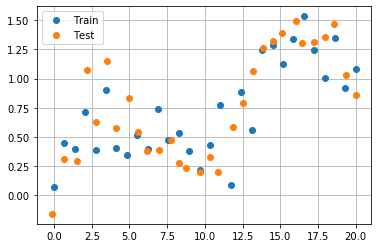

In [309]:
plt.plot(Xtrain, Ttrain, 'o', label='Train')
plt.plot(Xtest, Ttest, 'o', label='Test')
plt.grid(True) 
plt.legend();

In [171]:
def main(n_hidden,Xtrain,Ttrain):
    n_inputs = Xtrain.shape[1]
    n_outputs = Ttrain.shape[1]

    n_epochs = 10000
    learning_rate = 0.1

    Ws = make_weights(n_inputs, n_hidden, n_outputs)

    Ws, stand_parms, error_trace= train_sgd(Xtrain, Ttrain, Ws, learning_rate, n_epochs)

    Ytrain = use(Xtrain, Ws, stand_parms)  
    rmse_train = rmse(Ytrain[-1], Ttrain)
    Ytest = use(Xtest, Ws, stand_parms)
    rmse_test = rmse(Ytest[-1], Ttest)

    print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')
    
    results=[]
    results.append(rmse_train)
    results.append(rmse_test)
    plot_graph(error_trace,Xtrain,Ttrain,Xtest,Ttest,Ws,stand_parms)
    return results

In [176]:
def plot_graph(error_trace,Xtrain,Ttrain,Xtest,Ttest,Ws,stand_parms):
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 1)
    plt.plot(error_trace)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 2)
    plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
    plt.plot(Xtest, Ttest, 'o', label='Testing Data')
    X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
    ZY_train = use(X_for_plot, Ws, stand_parms)
    plt.plot(X_for_plot, ZY_train[-1], label='Neural Net Output')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    for j in ZY_train[:-1]: 
        plt.figure(figsize=(10, 10))
        plt.subplot(3, 1, 3)
        plt.plot(X_for_plot, j)
        plt.xlabel('X')
        plt.ylabel('Hidden Unit Outputs')
        plt.show()

RMSE: Train 0.19 Test 0.22


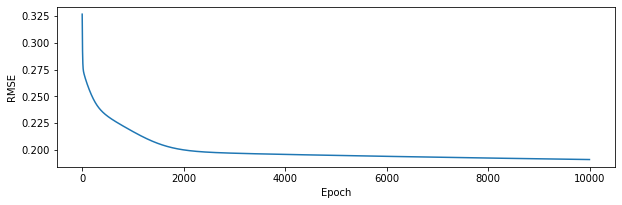

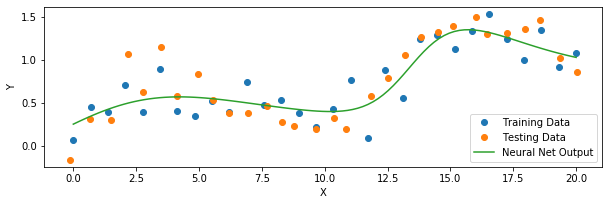

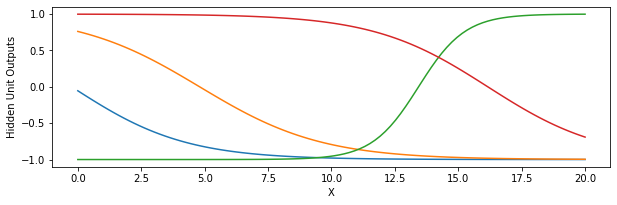

RMSE: Train 0.19 Test 0.21


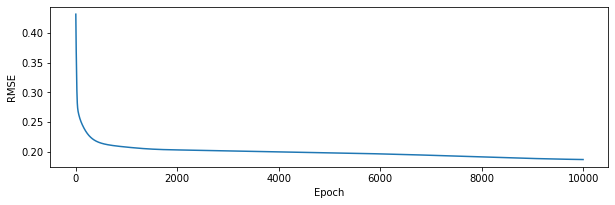

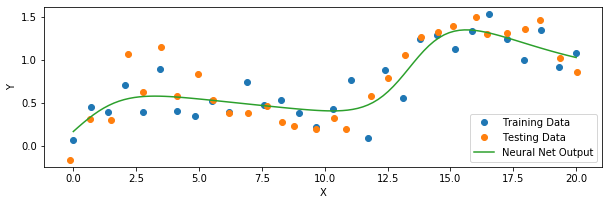

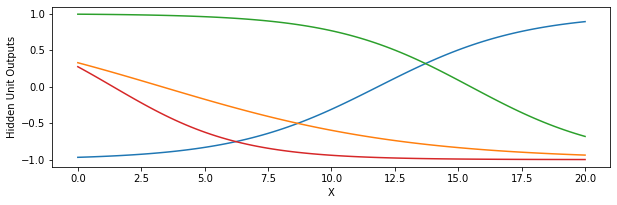

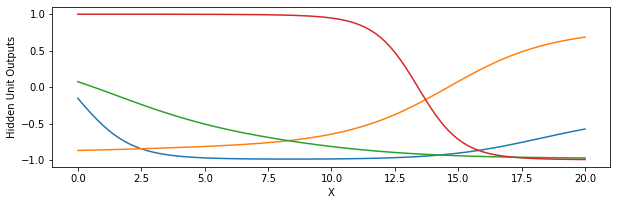

RMSE: Train 0.20 Test 0.27


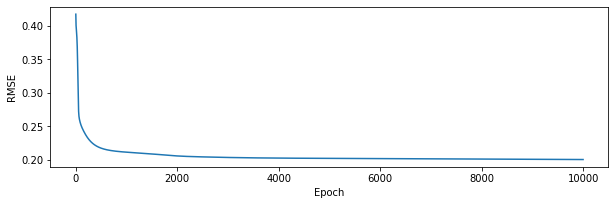

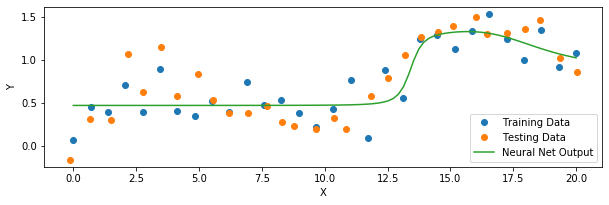

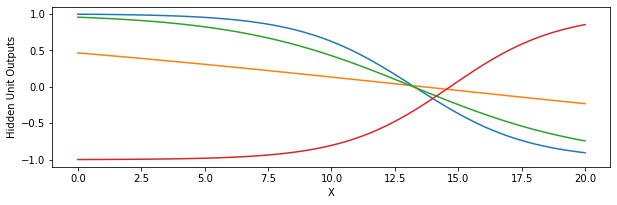

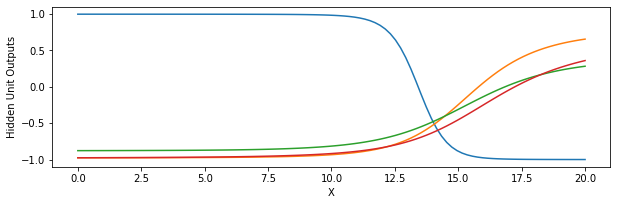

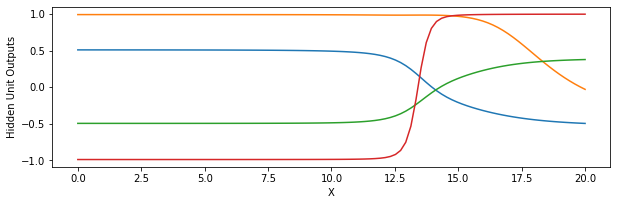

RMSE: Train 0.18 Test 0.21


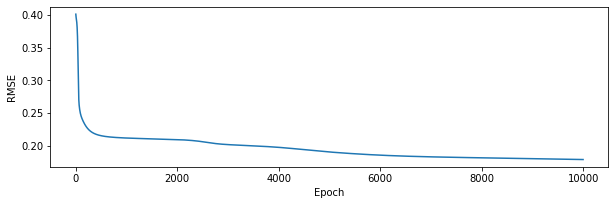

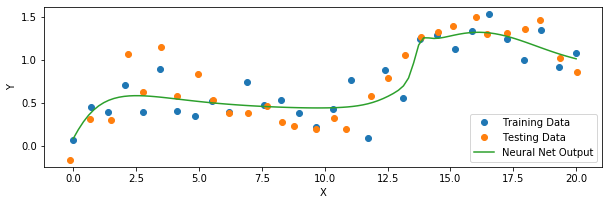

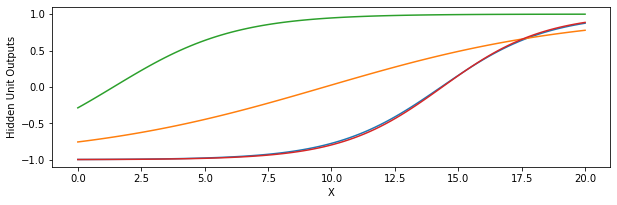

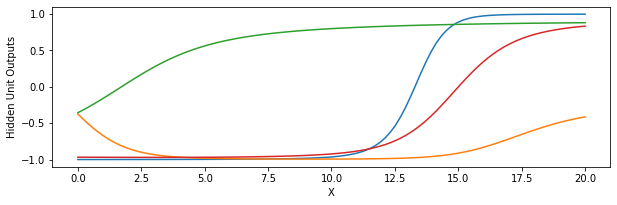

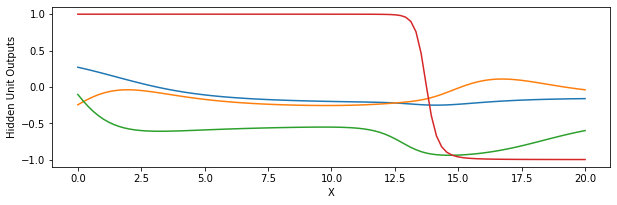

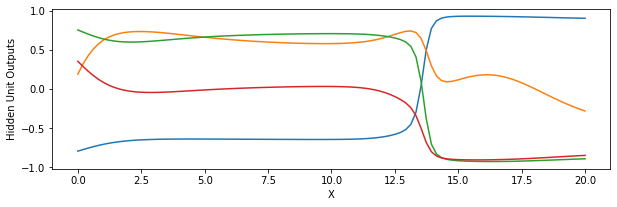

In [177]:
final_result = []
for i in range(4):
    n_hidden = []
    for j in range(i+1):
        n_hidden.append(4)
    result = main(n_hidden,Xtrain,Ttrain)
    final_result.append((i+1,result[0],result[1]))

Test your functions on the same one-dimensional data shown above.  Try your code using two hidden layers of as many units in each layer as you wish.  Plot the results, including an additional plot to show the outputs of each of the two hidden layers.

Write a for loop to create and train neural nets containing one, two, three and four hidden layers each with 4 hidden units. Train each for 10,000 epochs and a learning rate of 0.1. Collect list of results with each result being a list containing the number of layers and the RMSE for training and testing data.

Print a pretty table of your results be creating a `pandas` DataFrame of the results list (of lists). Discuss the results.

In [133]:
import pandas as pd
df = pandas.DataFrame(final_result, columns=('Layers', 'RMSE Train', 'RMSE Test'))
df

,Layers,RMSE Train,RMSE Test
0,1,0.226818,0.241969
1,2,0.227660,0.243646
2,3,0.254281,0.252607
3,4,0.449270,0.421891


## Discussion

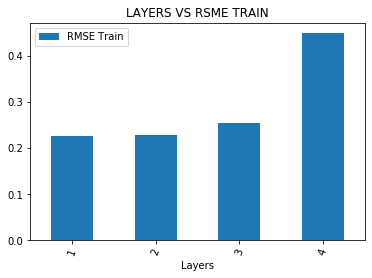

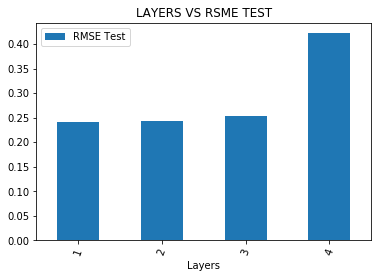

In [136]:
df.plot.bar(x="Layers", y="RMSE Train", rot=70, title="LAYERS VS RSME TRAIN");
df.plot.bar(x="Layers", y="RMSE Test", rot=70, title="LAYERS VS RSME TEST");

1. First set of plots shows the Root Mean Squared Error(RMSE) vs Epoch with 1 input layer and 1 outer layer with 1 unit of hidden layer.The error quickly reduces to a near zero value while it reaches 1000 epoch. It reaches the final rmse around 2000 epoch. The next graph shows that all predicted values (blue dots) are noted on the target line (green line),thus the error rate is reported. 
2. Seeing the second set of plots shows the Root Mean Squared Error(RMSE) vs Epoch with 1 input layer and 1 outer layer with 2 units of hidden layers.The error quickly reduces to a near zero value while it reaches 1000 epoch. It reaches the final rmse around 2000 epoch. The next graph also shows that all predicted values are noted on the target line,thus the error rate is reported.
3. From the third set of plots shows the Root Mean Squared Error(RMSE) vs Epoch with 1 input layer and 1 outer layer with 3 units of hidden layers.The error quickly reduces to a near zero value and reaches the final rmse around 6000 epoch. The next graph proves that all predicted values are noted on the target line,thus the error rate is reported. 
4. Final set of plots shows the Root Mean Squared Error(RMSE) vs Epoch with 1 input layer and 1 outer layer with 4 units of hidden layers.The error quickly reduces to a near zero value and reaches the final rmse around 7000 epoch. The next graph proves that all predicted values are noted on the target line,thus the error rate is reported. 

## Result

1. In this assignment, we run a heuristic called Stochastic Gradient Descent(SGD) which minimizes the cost function(RMSE) by performing forward and backward propagation for change weights of the neurons. That is why error valuereduces to a near zero at certain epoch based on the hidden layer. 
2. More hidden layer will over fit the data and lesser hidden layer will under fit the data.  
3. Main advantage of using multilayer neural network is they can be used for difficult to complex problems regardness of the number of layers.However, they need long training time sometimes. 
4. Once they are trained, the predictions are pretty fast.
5. Hyperbolic tangent works similar to the Sigmoid function, but has some differences.They are symmetric around the origin. Thus, they produce outputs that are close to zero.This would produce the least weight, and let your model converge faster.This would helpful for large models.

## Required Part Two

Create a new version of `forward` and `backward` that uses the asymmetric sigmoid activation function instead of the symmetric one that used `tanh`.  Repeat the above experiments with the one-dimensional data.

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
def add_ones(X):
    return np.insert(X, 0, 1, axis=1)

def make_weights(n_inputs, n_hiddens_list, n_outputs):
    Ws=[]
    for i in n_hiddens_list:
        V=np.random.uniform(-1, 1, size=(1 + n_inputs, i)) / np.sqrt(n_inputs + 1)
        Ws.append(V)
        n_inputs = i
    W = np.random.uniform(-1, 1, size=(1 + n_hiddens_list[-1], n_outputs)) / np.sqrt(n_hiddens_list[-1] + 1)
    Ws.append(W)
    return Ws
    
def forward_asig(Xst, Ws):
    Zs=[] 
    for i in Ws[:-1]:
        Z=(1/(1+np.exp(-(add_ones(Xst) @ i))))
        Zs.append(Z)
        Xst = Z
    Yst = add_ones(Z) @ Ws[-1]
    Zs.append(Yst)
#     print(Zs)
    return Zs

def backward_asig(Xst,Tst,Ws):
    n_samples = Xst.shape[0]
    n_outputs = Tst.shape[1]
    Zs = forward_asig(Xst,Ws)
    grad_VW=[]
    delta = -(Tst - Zs[-1]) /  (n_samples * n_outputs)
    i = len(Zs)-2
    while i >= 0:
        gradient_W = add_ones(Zs[i]).T @ delta
        grad_VW.append(gradient_W)
        delta = (delta @ Ws[i+1][1:, :].T) * Zs[i] * (1 - Zs[i])
        i -= 1
    gradient_V = add_ones(Xst).T @ delta
    grad_VW.append(gradient_V)
    grad_VW.reverse()
    return grad_VW
    
def train_sgd_asig(X, T, Ws, learning_rate, n_epochs):
    stand_parms = calc_standardize_parameters(X, T)
    Xst = standardize_X(X, stand_parms)
    Tst = standardize_T(T, stand_parms)
    grad_VW=[]
    error_trace = []
    Zs=[]
    Y=0
    for epoch in range(n_epochs):
        grad_VW = backward_asig(Xst, Tst, Ws)
        for i in range(len(grad_VW)):
            Ws[i] -= learning_rate * grad_VW[i]
        Zs = forward_asig(Xst,Ws)
        Y = unstandardize_T(Zs[-1], stand_parms)
        error_trace.append(rmse(Y, T))
    return Ws, stand_parms, error_trace
    
def use_asig(X,Ws,stand_parms):
    Xst = standardize_X(X, stand_parms)
    Zs = forward_asig(Xst,Ws)
    Zs[-1]=unstandardize_T(Zs[-1], stand_parms)
    return Zs

def rmse(Y, T):
    error = T - Y
    return np.sqrt(np.mean(error ** 2))

In [153]:
def calc_standardize_parameters(X, T):
    Xmeans = X.mean(axis=0)
    Xstds = X.std(axis=0)
    Tmeans = T.mean(axis=0)
    Tstds = T.std(axis=0)
    return {'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

def standardize_X(X, stand_parms):
    return (X - stand_parms['Xmeans']) / stand_parms['Xstds']


def unstandardize_X(Xst, stand_parms):
    return Xst * stand_parms['Xstds'] + stand_parms['Xmeans']


def standardize_T(T, stand_parms):
    return (T - stand_parms['Tmeans']) / stand_parms['Tstds']


def unstandardize_T(Tst, stand_parms):
    return Tst * stand_parms['Tstds'] + stand_parms['Tmeans']

In [154]:
n_samples = 30

Xtrain = np.linspace(0., 20.0, n_samples).reshape((n_samples, 1))
Ttrain = 0.2 + 0.05 * (Xtrain) + 0.4 * np.sin(Xtrain / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n_samples, 1))
Ttest = 0.2 + 0.05 * (Xtest) + 0.4 * np.sin(Xtest / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

In [179]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((30, 1), (30, 1), (30, 1), (30, 1))

#### Graph 1: Training vs Testing

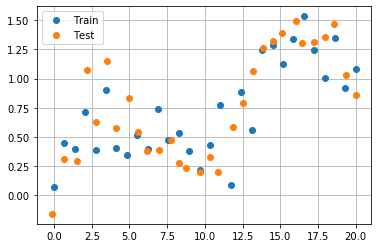

In [307]:
plt.plot(Xtrain, Ttrain, 'o', label='Train')
plt.plot(Xtest, Ttest, 'o', label='Test')
plt.grid(True) 
plt.legend();

In [156]:
def main(n_hidden,Xtrain,Ttrain):
    n_inputs = Xtrain.shape[1]
    n_outputs = Ttrain.shape[1]

    n_epochs = 10000
    learning_rate = 0.1

    Ws = make_weights(n_inputs, n_hidden, n_outputs)

    Ws, stand_parms, error_trace= train_sgd_asig(Xtrain, Ttrain, Ws, learning_rate, n_epochs)

    Ytrain = use_asig(Xtrain, Ws, stand_parms)  
    rmse_train = rmse(Ytrain[-1], Ttrain)
    Ytest = use_asig(Xtest, Ws, stand_parms)
    rmse_test = rmse(Ytest[-1], Ttest)

    print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')
    
    results=[]
    results.append(rmse_train)
    results.append(rmse_test)
    plot_graph(error_trace,Xtrain,Ttrain,Xtest,Ttest,Ws,stand_parms)
    return results

In [157]:
def plot_graph(error_trace,Xtrain,Ttrain,Xtest,Ttest,Ws,stand_parms):
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 1)
    plt.plot(error_trace)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 2)
    plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
    plt.plot(Xtest, Ttest, 'o', label='Testing Data')
    X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
    ZY_train = use(X_for_plot, Ws, stand_parms)
    plt.plot(X_for_plot, ZY_train[-1], label='Neural Net Output')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    for j in ZY_train[:-1]: 
        plt.figure(figsize=(10, 10))
        plt.subplot(3, 1, 3)
        plt.plot(X_for_plot, j)
        plt.xlabel('X')
        plt.ylabel('Hidden Unit Outputs')
        plt.show()

RMSE: Train 0.19 Test 0.24


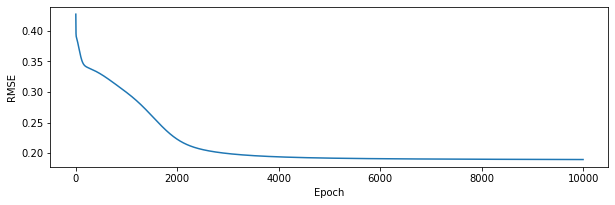

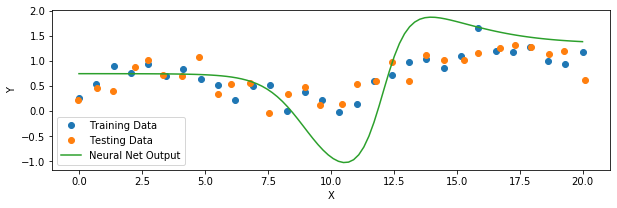

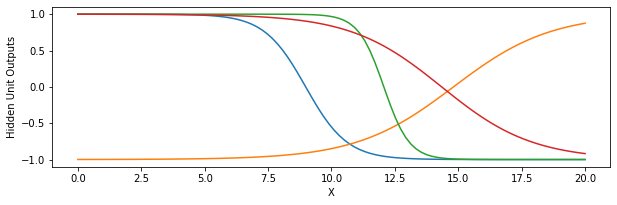

RMSE: Train 0.19 Test 0.24


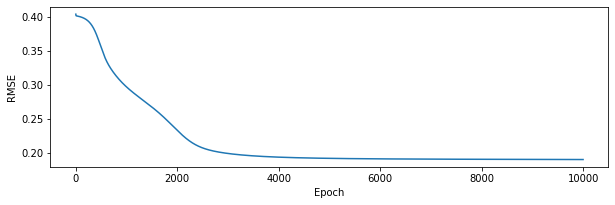

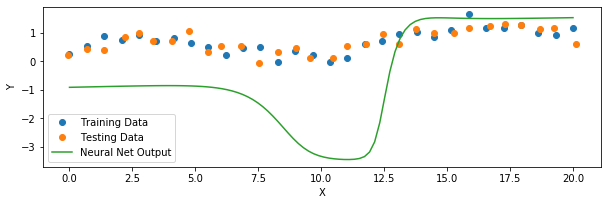

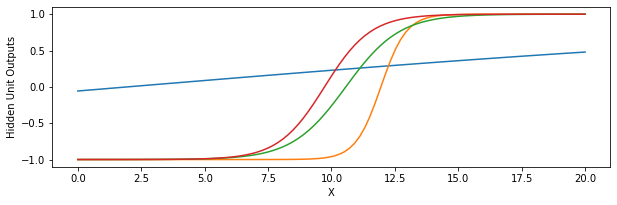

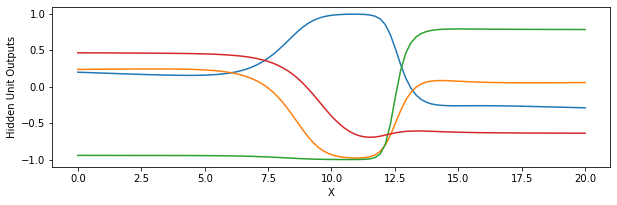

RMSE: Train 0.26 Test 0.27


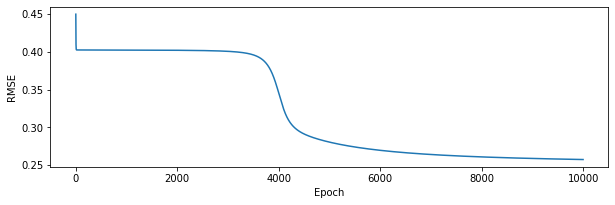

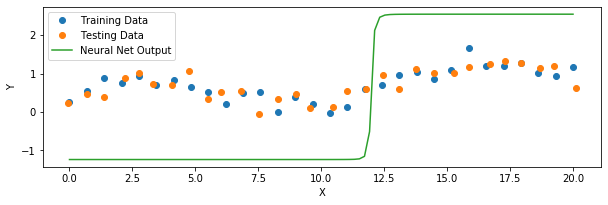

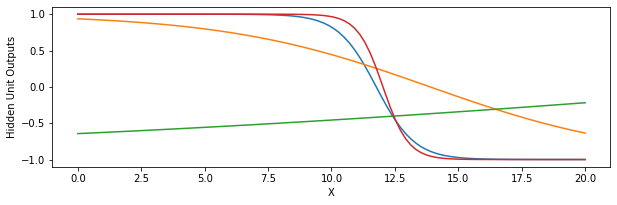

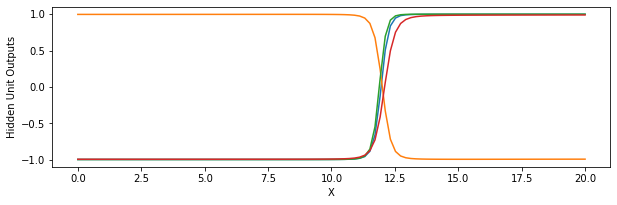

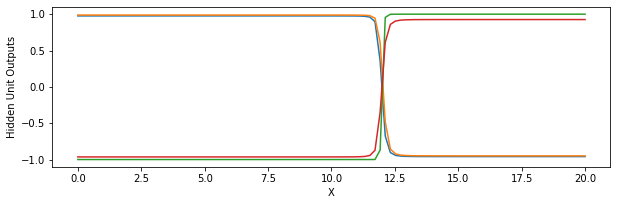

RMSE: Train 0.40 Test 0.38


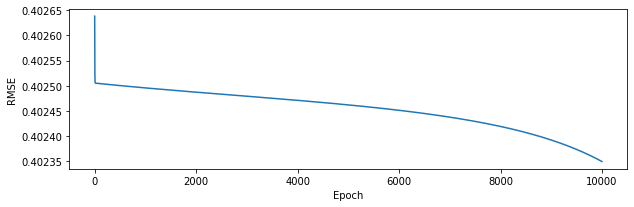

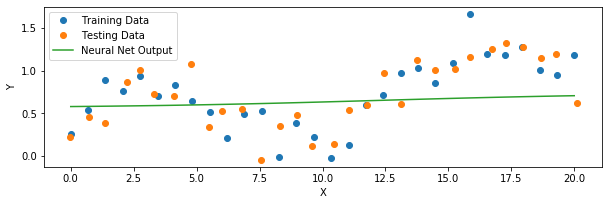

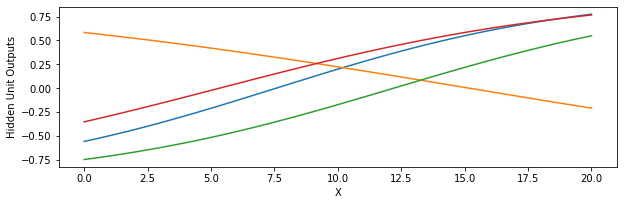

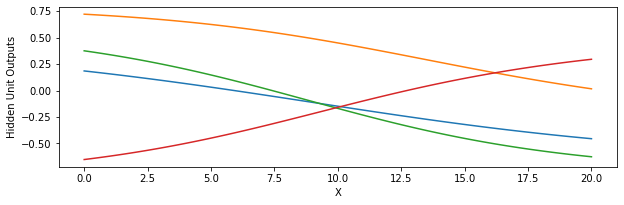

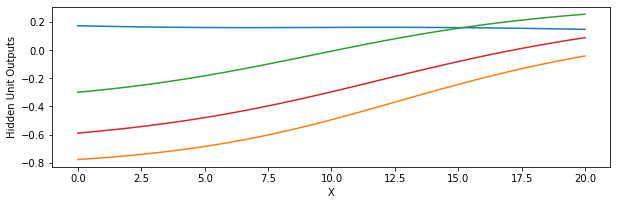

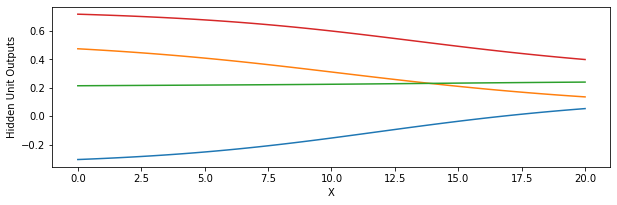

In [158]:
final_result = []
for i in range(4):
    n_hidden = []
    for j in range(i+1):
        n_hidden.append(4)
    result = main(n_hidden,Xtrain,Ttrain)
    final_result.append((i+1,result[0],result[1]))

In [159]:
import pandas
df = pandas.DataFrame(final_result, columns=('Layers', 'RMSE Train', 'RMSE Test'))
df

,Layers,RMSE Train,RMSE Test
0,1,0.189645,0.237207
1,2,0.190691,0.239143
2,3,0.257373,0.265117
3,4,0.402349,0.382221


### Discussion

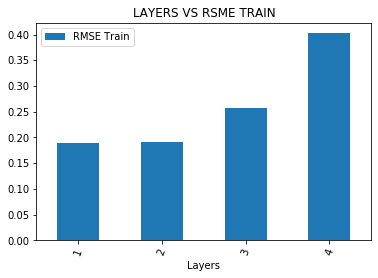

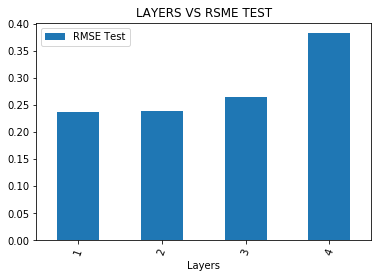

In [160]:
df.plot.bar(x="Layers", y="RMSE Train", rot=70, title="LAYERS VS RSME TRAIN");
df.plot.bar(x="Layers", y="RMSE Test", rot=70, title="LAYERS VS RSME TEST");

1. First set of plots shows the Root Mean Squared Error(RMSE) vs Epoch with 1 input layer and 1 outer layer with 1 unit of hidden layer.The error quickly reduces to a near zero value while it reaches 1000 epoch. It reaches the final rmse around 4000 epoch. The next graph shows that all predicted values (blue dots) are noted on the target line (green line),thus the error rate is reported. 
2. Second set of plots shows the Root Mean Squared Error(RMSE) vs Epoch with 1 input layer and 1 outer layer with 2 units of hidden layers.The error quickly reduces to a near zero value while it reaches 2000 epoch. It reaches the final rmse around 4000 epoch. The next graph also shows that all predicted values are noted on the target line,thus the error rate is reported.
3. From the third set of plots shows the Root Mean Squared Error(RMSE) vs Epoch with 1 input layer and 1 outer layer with 3 units of hidden layers.The error quickly declines to 4000 epoch and reaches the final rmse at 6000 epoch.The next graph proves that all predicted values are noted on the target line,thus the error rate is reported. 
4. Final set of plots shows the Root Mean Squared Error(RMSE) vs Epoch with 1 input layer and 1 outer layer with 4 units of hidden layers.The error quickly declines and reaches the final rmse at 10000.The next graph proves that all predicted values are noted on the target line,thus the error rate is reported. 

## Result

1. In this assignment, we run a heuristic called Stochastic Gradient Descent(SGD) which minimizes the cost function(RMSE) by performing forward and backward propagation for change weights of the neurons. That is why error valuereduces to a near zero at certain epoch based on the hidden layer. 
2. More hidden layer will over fit the data and lesser hidden layer will under fit the data.  
3. Main advantage of using multilayer neural network is they can be used for difficult to complex problems regardness of the number of layers.However, they need long training time sometimes. 
4. Once they are trained, the predictions are pretty fast.
5.  Sigmoid function are not symmetric as it has a steady state at 0.It exists between (0 to 1) so it is useful for models where it is necessary to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

## Similarities and Differences between the resuls of Sigmod Function and Hyperbolic Tangent

Differences:
1. Sigmod Function is useful for cases that we need a probability value at the output whereas Hyperbolic Tangent is useful for features that requires smaller weights.
2. Sigmod Function tend to be under fitting where as Hyperbolic Tangent is not because it is not likely to generalize well on the testing data. Thus, it won't perform well on the training data and results in high bias with low variance.  

Similarities: 
1. As the number of hidden layer increase, the RMSE train value and RMSE test value increases because difference in initial weights lead to difference local minima , thus leads to more number of neurons than required.

## Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading A2grader.tar and extract A2grader.py from it. Run the code in the following cell to demonstrate an example grading session. The remaining 40 points will be based on other testing and the results you obtain and your discussions.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.

For the grading script to run correctly, you must first name this notebook as 'Lastname-A2.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [96]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'ESWARAN-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

## Testing ####################################################################

    X = np.arange(4).reshape(-1, 1) + 5
    T = np.array([1, 2, -3, -4]).reshape((-1, 1))
    Ws = make_weights(1, [3, 4], 1)
    for W in Ws:
        W[:] = np.linspace(-1, 1, W.size).reshape(W.shape)

    stand_parms = {'Xmeans': np.array([[0]]), 'Xstds': np.array([[1]]),
                   'Tmeans': np.array([[0]]), 'Tstds': np.array([[1]])}

    def print_layers(what, lst):
        print(f'{what}:')
        for (i, element) in enumerate(lst):
            print(f' Layer {i}:')
            print(f' {element}')

    print('X is')
    print(X)
    print_layers('Ws', Ws)
    print('stand_parms is')
    print(stand_parms)
    Ys = use(X, Ws, stand_parms)

X is
 [[5]
 [6]


# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.

I have used the database was created with records of behavior of the urban traffic of the city of Sao Paulo in Brazil from December 14, 2009 to December 18, 2009 (From Monday to Friday). It consists of 18 attributes: 
1. Hour
2. Immobilized bus
3. Broken Truck
4. Vehicle excess
5. Accident victim
6. Running over
7. Fire Vehicles
8. Occurrence involving freight
9. Incident involving dangerous freight
10. Lack of electricity
11. Fire
12. Point of flooding
13. Manifestations
14. Defect in the network of trolleybuses
15. Tree on the road
16. Semaphore off
17. Intermittent Semaphore
18. Slowness in traffic (%) (Target)

http://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil

### Step 1: Extracting data from CSV file 

### Step 2: Segregating data from CSV

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rc('animation', html='jshtml')
plt.rc('animation', embed_limit = 1e9)

In [279]:
data = pd.read_csv('Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv', delimiter=';', decimal=',', usecols=range(18), na_values=-200)
data

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4


In [280]:
data.isna().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

In [281]:
data = data.dropna(axis=0)
data.shape

(135, 18)

In [282]:
data.isna().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

In [283]:
SO = data['Slowness in traffic (%)']
SO = np.array(data['Slowness in traffic (%)'])              # Transforming the pandas data into a numpy array.
T = SO.reshape(-1, 1)                                       # CO Data is in a single column
Tnames = ['SO']                                             # Create labels as CO 
hour = np.array(data['Hour (Coded)'])
print(hour)
X = hour.reshape(-1, 1)                                     # Hour Data is in a single column 
Xnames = ['Hour']
# print(np.hstack(X**2)@T)
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26 27  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19 20 21 22 23 24 25 26 27  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27]
X.shape = (135, 1) Xnames = ['Hour']
T.shape = (135, 1) Tnames = ['SO']


In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(
    X, T, test_size=0.25, random_state=42)

In [285]:
X_train.shape, X_test.shape, T_train.shape, T_test.shape

((101, 1), (34, 1), (101, 1), (34, 1))

#### Graph 3: Hour vs Slowness in Traffic

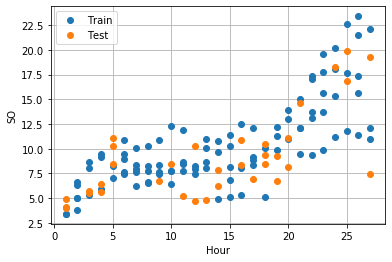

In [304]:
plt.plot(X_train, T_train, 'o', label='Train')
plt.plot(X_test, T_test, 'o', label='Test')
plt.legend();
Tnames = ['SO']                                               
Xnames = ['Hour']
plt.xlabel(Xnames[0])               
plt.ylabel(Tnames[0]);             
plt.grid(True)  

In [296]:
n_inputs = X_train.shape[1]
n_hiddens = [20,20,20,10]
n_outputs = T_train.shape[1]
print(n_inputs, n_hiddens, n_outputs)

1 [20, 20, 20, 10] 1


### Sigmod Function

In [298]:
n_epochs = 100000
learning_rate = 0.8

Ws = make_weights(n_inputs, n_hiddens, n_outputs)

Ws, stand_parms, error_trace = train_sgd_asig(X_train, T_train,Ws, learning_rate, n_epochs)

Y_train = use_asig(X_train, Ws, stand_parms)  
rmse_train = rmse(Y_train[-1], T_train)
Y_test = use_asig(X_test, Ws, stand_parms)
rmse_test = rmse(Y_test[-1], T_test)
print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')


RMSE: Train 2.42 Test 2.68


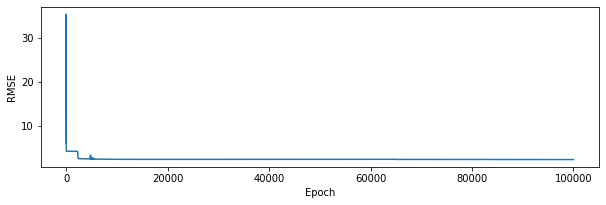

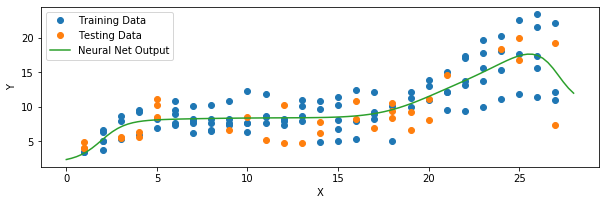

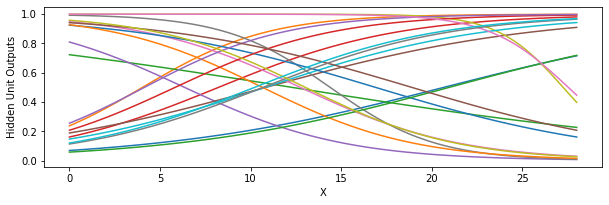

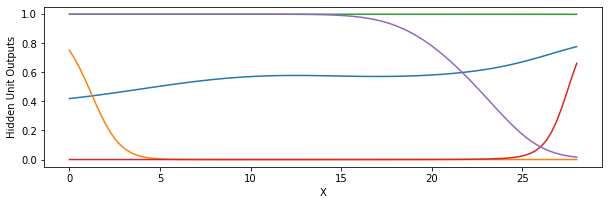

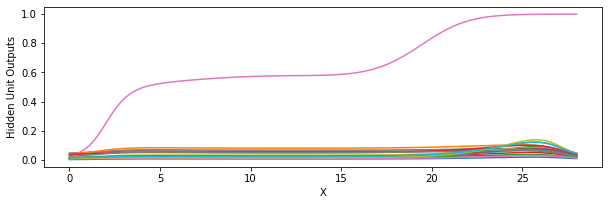

In [295]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 2)
plt.plot(X_train, T_train, 'o', label='Training Data')
plt.plot(X_test, T_test, 'o', label='Testing Data')
X_for_plot = np.linspace(0, 28, 100).reshape(-1, 1)
ZY_train = use_asig(X_for_plot, Ws, stand_parms)
plt.plot(X_for_plot, ZY_train[-1], label='Neural Net Output')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

for j in ZY_train[:-1]: 
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 3)
    plt.plot(X_for_plot, j)
    plt.xlabel('X')
    plt.ylabel('Hidden Unit Outputs')
    plt.show()

### Hyperbolic tangent

In [299]:
n_inputs = X_train.shape[1]
n_hiddens = [20,20,20,10]
n_outputs = T_train.shape[1]
print(n_inputs, n_hiddens, n_outputs)

1 [20, 20, 20, 10] 1


In [300]:
n_epochs = 100000
learning_rate = 0.8

Ws = make_weights(n_inputs, n_hiddens, n_outputs)

Ws, stand_parms, error_trace = train_sgd(X_train, T_train,Ws, learning_rate, n_epochs)

Y_train = use(X_train, Ws, stand_parms)  
rmse_train = rmse(Y_train[-1], T_train)
Y_test = use(X_test, Ws, stand_parms)
rmse_test = rmse(Y_test[-1], T_test)
print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')

RMSE: Train 2.39 Test 2.80


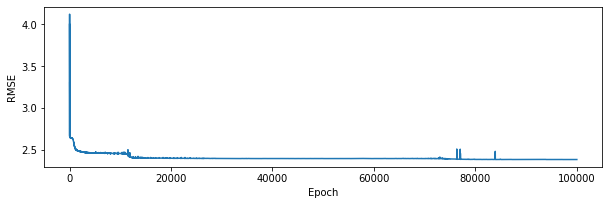

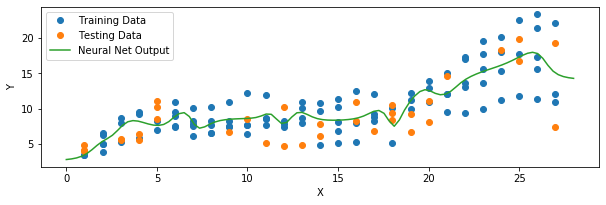

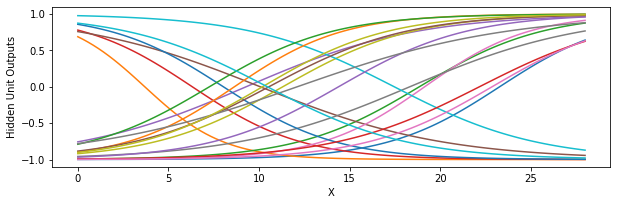

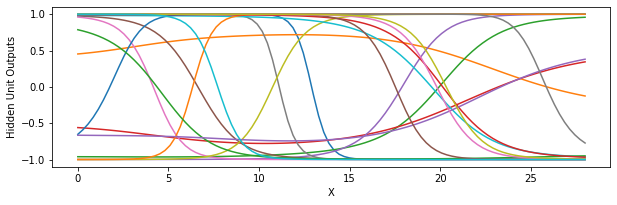

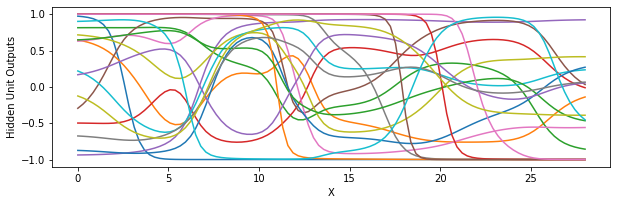

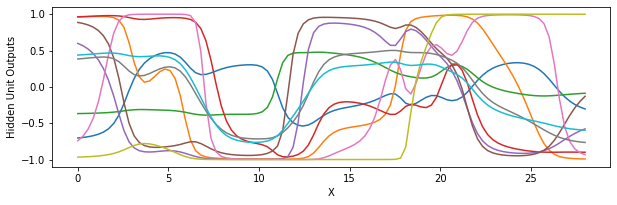

In [301]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 2)
plt.plot(X_train, T_train, 'o', label='Training Data')
plt.plot(X_test, T_test, 'o', label='Testing Data')
X_for_plot = np.linspace(0, 28, 100).reshape(-1, 1)
ZY_train = use(X_for_plot, Ws, stand_parms)
plt.plot(X_for_plot, ZY_train[-1], label='Neural Net Output')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

for j in ZY_train[:-1]: 
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 3)
    plt.plot(X_for_plot, j)
    plt.xlabel('X')
    plt.ylabel('Hidden Unit Outputs')
    plt.show()

### Observation

Activation functions plays a major effect on the neural network’s ability to converge and the convergence speed.But,in some cases, activation functions might prevent neural networks from converging. There has been a proper fit while dealing with both the activationg function. In this section,a heuristic called Stochastic Gradient Descent(SGD) used for minimizing the cost function(RMSE) by performing forward and backward propagation for change weights of the neurons. That is why error valuereduces to a near zero at certain epoch based on the hidden layer. From the graph, we get to know that the problem of fitting is more to do with the parametrization of the network, i.e total number of weights, and there to do with total number of nodes and how they are distributed.It is all up to the parameters used in the function. Sigmod activation function and Hyperbolic tangent are fiiting the target, but based on the complexity of the network,number of hidden layers and number of hidden units, Hyperbolic Tangent is more appropriate that Sigmod Function whihc lead to low bias and high variance.  

### Future Scope

From the above analysis, it would be preferable to use linear activation function because it has the capacity to handle complexity of varying parameters of input data.Along with that, this can be extended more with more number of hidden layers.

## REFERENCES

1. https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
2. https://mathematica.stackexchange.com/questions/130556/curve-fitting-using-an-asymmetrical-sigmoid-function
3. https://www.geeksforgeeks.org/understanding-logistic-regression/